# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_SARS-CoV-2_TestMetadata_with_viral.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
Query
Strand
%N
Length(nt)
Length(aa)
#Muts
%Muts
#UniqueMuts
%UniqueMuts
#ExistingMuts
%ExistingMuts
Comment
Symbol
Reference
UniqueMutList
ExistingMutList
Clade
IfExistSpecialChar


# Preprocessing and cleaning the data

In [4]:
#important features
#important features
start_data_row = 0
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['location','gender','age','status']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)

In [6]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)
Data.index = range(len(Data))

In [7]:
#organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

['Oceania   Australia ',
 'Oceania   Australia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Asia   China ',
 'Europe   Russia ',
 'Asia   China ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Ecuador ',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Oceania   New Zealand ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   Thailand ',
 'Asia   Thailand ',
 'Nort

In [8]:
Data.location =listToStr_location
Data.groupby('location')
Data

,location,gender,age,status
0,Oceania Australia,male,53,Recovered
1,Oceania Australia,Female,21,Recovered
2,Asia Georgia,Female,"31, 6 month",Hospitalized
3,Asia Georgia,Male,"59, 1 months",Hospitalized
4,Asia Georgia,Male,33.5,Hospitalized
...,...,...,...,...
199,North America USA Puerto Rico,unknown,unknown,Asymptomatic
200,Africa Nigeria,Female,30,Not Hospitalized
201,Oceania Guam,Male,62,Outpatient
202,Asia India,Female,63,Mild


In [9]:
#replacing the age that were in months to year
Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')

for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'


In [10]:
#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')

In [11]:
Data.replace(['female','Female'],value= ['Female','Female'], inplace=True)
Data.replace(['male','Male'],value= ['Male','Male'], inplace=True)        

In [12]:
#the unknown gender is set to missing category
for i in range(1,len(Data)):
    index_4 = Data.gender[i].find('unknown') 
    if index_4!=-1:
        Data.gender[i] = 'missing'


In [13]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

In [14]:
#Finding unknown data
Data.loc[Data['gender']=='unknown']

,location,gender,age,status


In [15]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]),pd.get_dummies(Data[['gender']]), Data[['age','status']]], axis=1)
Data_model.head()

,location_Africa Egypt,location_Africa Nigeria,location_Asia Bangladesh,location_Asia China,location_Asia Georgia,location_Asia Hong Kong,location_Asia India,location_Asia Iran,location_Asia Israel,location_Asia Japan,...,location_Oceania New Zealand,location_South America Brazil,location_South America Colombia,location_South America Ecuador,location_South America Uruguay,gender_Female,gender_Male,gender_missing,age,status
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,53,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,21,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,33.5,0


In [16]:
#checking the balance in the data
Data_model['status'].value_counts()

0    172
1     32
Name: status, dtype: int64

# Logistic regression model

In [17]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    172
1     32
Name: status, dtype: int64

In [18]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

### Imputing the unknown data using KNN

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(X_train[['age']])
X_train['age']=imputer.transform(X_train[['age']])
X_test['age']=imputer.transform(X_test[['age']])

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Balancing the data

In [20]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

### Scaling the data

In [21]:
#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', penalty='l2',C= 1, max_iter=200, n_jobs=1, tol=0.0001)
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
from sklearn.ensemble import  RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train, y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)
feat_importances = pd.Series(model_RFR.feature_importances_, index = X.columns)

In [24]:
feat_importances.nlargest(7).values

array([0.41485786, 0.2564754 , 0.06494437, 0.05475454, 0.03517017,
       0.03426626, 0.02407013])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


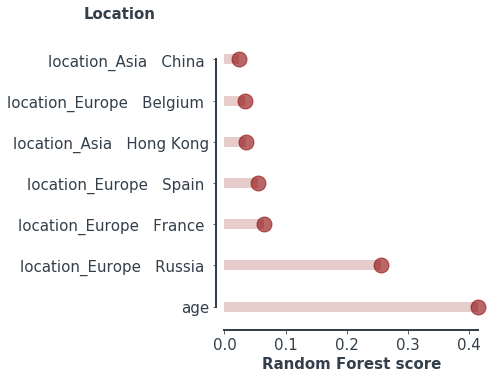

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(feat_importances.nlargest(7))+1))

fig, ax = plt.subplots(figsize=(5,5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
#plt.hlines(y=my_range, xmin=0, xmax=feat_importances.nlargest(7).values, color='#007acc', alpha=0.2, linewidth=10)

plt.hlines(y=my_range, xmin=0, xmax=feat_importances.nlargest(7).values, color='darkred', alpha=0.2, linewidth=10)
# create for each expense type a dot at the level of the expense percentage value
plt.plot(feat_importances.nlargest(7).values, my_range, "o", markersize=15, color='darkred', alpha=0.6)

#set labels
ax.set_xlabel('Random Forest score', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=15)
plt.yticks(my_range, (feat_importances.nlargest(7).index))

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Location', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))
